# Assignment 04: Constructing Confidence Interval

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
import matplotlib.pyplot as plt
from sklearn.utils import resample
seed=1110
np.random.seed(seed)

## Question 1 - <span style="color:green">[100]</span>
You are going to work on a dataset which lists some features of the soccer players participated in the 2022 FIFA World Cup. We want to predict the players value and quantify the uncertainty of our prediction using what we learnt in week 4. The dataset has the following attributes:
- `Age`: Player age in years
- `Overall`: Player overall performance score (higher better)
- `Potential`: Player potential score (higher better)
- `Value`: Player value *i.e*, the amount of money in euros a club should pay in order to purchase the player (higher better)
- `Wage`: Player stipend in euros (higher better)
- `Preferred Foot`: Player preferred foot to play
- `International Reputation`: Player international fame (higher better)
- `Week Foot`: Performance score of player weak foot (higher better)
- `Skill Moves`: Player move skill score (higher better)
- `Body Type`: Player body type
- `Position`: Position player holds on the pitch
- `Height`: Player height in centimeters
- `Weight`: Player weight in kilograms

Therefore the target is `Value`.

### Q 1.1 - <span style="color:red">[1]</span> - Load `data.csv` and show the first 5 rows.

In [2]:
data = pd.read_csv('/content/data.csv')
print(data[0:5])

   Age  Overall  Potential        Value      Wage Preferred Foot  \
0   27       87         88   91000000.0  115000.0          Right   
1   27       86         87   78500000.0  190000.0          Right   
2   30       85         85   46500000.0   46000.0           Left   
3   31       91         91  107500000.0  350000.0          Right   
4   25       86         89   89500000.0  110000.0          Right   

   International Reputation  Weak Foot  Skill Moves Body Type Position  \
0                       4.0        4.0          3.0    Stocky  Reserve   
1                       3.0        3.0          4.0    Stocky   Middle   
2                       2.0        3.0          3.0    Stocky     Back   
3                       4.0        5.0          4.0    Stocky   Middle   
4                       3.0        3.0          3.0    Normal   Middle   

   Height  Weight  
0     189      82  
1     179      69  
2     172      69  
3     181      70  
4     172      68  


### Q 1.2 - <span style="color:red">[3]</span> - Use a pandas relevant method to reveal `Dtype` of the features and indicate whether the date set has any `Null` values. 

In [3]:
print(data.dtypes)
print(data.isnull().values.any())

Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Body Type                    object
Position                     object
Height                        int64
Weight                        int64
dtype: object
False


#### *Written Answer:*


### Q 1.3 - <span style="color:red">[3]</span> - Use a pandas relevant method to get a summary statistics of the data and inspect it. Which features have the lowest and highest standard deviation respectively? What was the age of the youngest player in the World Cup? 

In [4]:
#
data.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,17591.000000,17591.000000,17591.000000,1.759100e+04,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000
mean,23.109317,63.354954,70.973907,2.759077e+06,8244.784265,1.103405,2.899324,2.300097,180.893639,74.322779
std,4.623732,8.029464,6.523326,7.852143e+06,20502.356045,0.400888,0.663286,0.752437,6.965210,6.982115
min,15.000000,44.000000,47.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,149.000000,48.000000
25%,20.000000,58.000000,67.000000,3.250000e+05,600.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,22.000000,63.000000,71.000000,7.000000e+05,2000.000000,1.000000,3.000000,2.000000,181.000000,74.000000
75%,26.000000,69.000000,75.000000,1.800000e+06,6000.000000,1.000000,3.000000,3.000000,186.000000,79.000000
max,54.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,110.000000


#### *Written Answer:*
15 years old
Highest is value
lowest is international reputation

### Q 1.4 - <span style="color:red">[4]</span> - Use a pandas relevant method to see the distribution of the numerical features all in one plot window. Which ones look like Gaussian?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2462633490>,
      dtype=object)

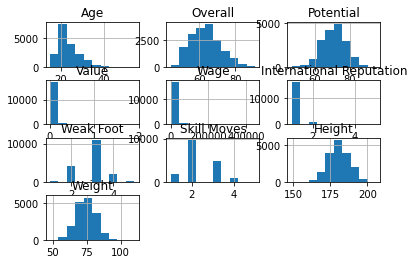

In [5]:
data.hist()



```
# This is formatted as code
```

#### *Written Answer:*
Height is the one that seems to be gaussian

### Q 1.5 - <span style="color:red">[2]</span> - Perform one hot encoding to prepare the categorical values for linear regression.

In [6]:
#
dataEncoded = pd.get_dummies(data)


### Q 1.6 - <span style="color:red">[4]</span> - Use `seaborn.jointplot` to investigate the relationship between `Overall` and `Value` as well as `Wage` and `Value`.

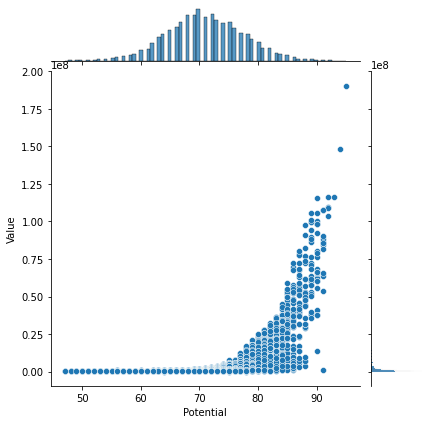

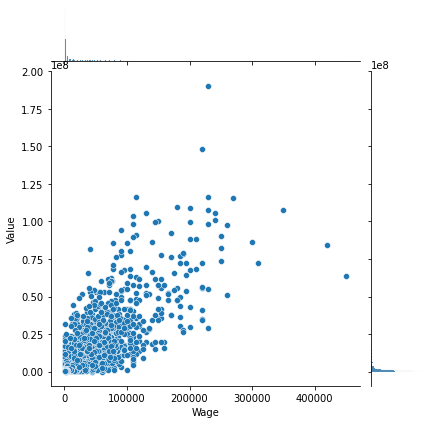

In [7]:
#
sns.jointplot(data=dataEncoded, x="Potential", y="Value")
sns.jointplot(data=dataEncoded, x="Wage", y="Value")

### Q 1.7 - <span style="color:red">[8]</span> - Where applicable, use logarithm function to transform either `Overall`, `Wage`, or `Value` to make them better fit the assumptions of linear regression. `Joinplot` the transformed versions.

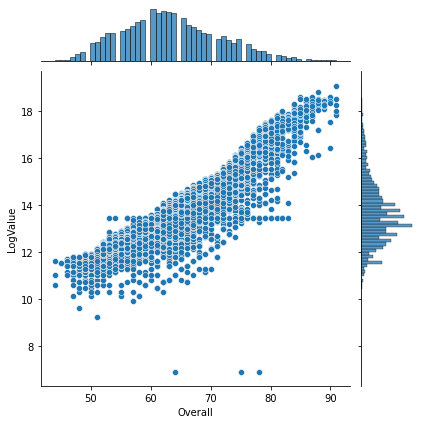

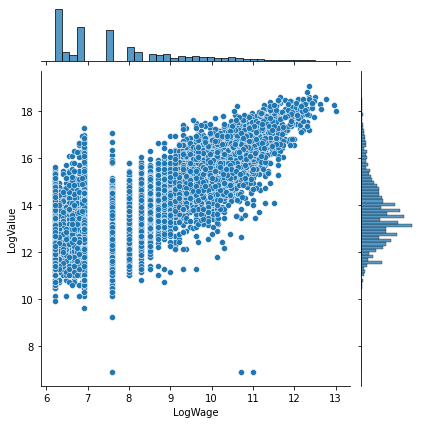

In [8]:
#

dataEncoded["LogValue"] = np.log(dataEncoded["Value"])
dataEncoded["LogWage"] = np.log(dataEncoded["Wage"],)
sns.jointplot(data=dataEncoded, x="Overall", y="LogValue")
sns.jointplot(data=dataEncoded, x="LogWage", y="LogValue")

### Q 1.8 - <span style="color:red">[4]</span> - Add the transformed version of the variables which you chose to transform as new columns to your dataframe.

In [9]:
#Done above needed it there cause i use them in my plot

### Q 1.9 - <span style="color:red">[4]</span> - Use `pandas.corr()` to output the pairwise correlation between every feature and the target.

In [10]:
#
dataEncoded.corr()["Value"][:]

Age                         0.170291
Overall                     0.567571
Potential                   0.513512
Value                       1.000000
Wage                        0.810439
International Reputation    0.541435
Weak Foot                   0.174253
Skill Moves                 0.288468
Height                      0.032431
Weight                      0.059704
Preferred Foot_Left         0.023495
Preferred Foot_Right       -0.023495
Body Type_Lean             -0.032864
Body Type_Normal           -0.058364
Body Type_Stocky            0.201878
Position_Back               0.139002
Position_Forward            0.107982
Position_Middle             0.139749
Position_Reserve           -0.248424
LogValue                    0.651667
LogWage                     0.554560
Name: Value, dtype: float64

### Q 1.10 - <span style="color:red">[4]</span> - What are the most positively and negatively correlated features? How do you interpret the positive and negative correlations?

#### *Written Answer:*

Most Positive:


1. Wage
2. Overall
3. Log Wage


Most Negative:

1. Position_Reserve
2. Body Type_Normal
3. Body Type_Lean

With the most positive being the top 3 stronger and most of the other positive still being stronger. Meaning that most factors have a positive correlation with value as they increase so does value. 




### Q 1.11 - <span style="color:red">[15]</span> - Let's train a model to predict player `Value` using all features except some (Hint: think about those which you transformed)
1. This time instead of R-squared, use the `mean_squared_error` to calculate Root Mean Squared Error (RMSE) as your model scorer
2. Split the data into train and test with `test_size=0.2, random_state=seed`
3. Pick `LinearRegression()` from sklearn as your model
4. Report both prediction (*i.e.*, on training set) and generalization (*i.e.*, on test set) RMSE scores of your model

In [11]:
#
X_train, X_test, y_train, y_test = train_test_split(dataEncoded.drop(columns=["LogValue","LogWage"]),data['Value'], random_state=seed, test_size= 0.2)
valReg = LinearRegression().fit(X=X_train, y=y_train)
y_pred = valReg.predict(X_test)
yT_pred = valReg.predict(X_train)
print('Generalization Score: ',(mean_squared_error(y_test,y_pred))*10**17,"* 10^-17")
print('Prediction Score: ',(mean_squared_error(y_train, yT_pred))*10**17,"* 10^-17")

Generalization Score:  1.2737389926483875 * 10^-17
Prediction Score:  1.3044549917344062 * 10^-17


### Q 1.12 - <span style="color:red">[8]</span> - Scatter plot `Overall` vs true `Value` as well as `Overall` vs predicted `Value` in the same graph window over the test set. 

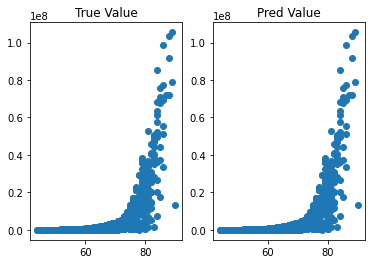

In [12]:
#
figure, axis = plt.subplots(1, 2)
axis[0].set_title('True Value')
axis[0].scatter(X_test["Overall"], y_test)
axis[1].set_title('Pred Value')
axis[1].scatter(X_test["Overall"], y_pred)


### Q 1.13 - <span style="color:red">[15]</span> - Calculate confidence interval (based on 99% confidence level) for mean `Value` by bootstrapping. For this purpose, code a bootstrap function that in each bootstrap iteration, samples from the training set to fit the linear regression model and uses the test set to make predictions - therefore your bootstrap statistic is the average of the predictions over the test set. Your function must take as input arguments: your model, Xtrain, ytrain, Xtest, and numboot=100. The function must return only one object that is the array of recorded values for the bootstrap statistic.

In [13]:

#
def bootStrapStat(model, X_train, y_train, X_test, numboot=100):
    bstat = []
    i = 0
    num = len(X_train)
    #t.bootstrap()
    while i<numboot:
      xSample = X_train.sample(n=num,replace=True)
      ySample  = y_train.sample(n=num, replace=True)
      model.fit(xSample, ySample)
      by_pred = model.predict(X_test)
      bstat.append(np.mean(by_pred))
      i+=1
    return (bstat)
bm = pd.DataFrame(data=bootStrapStat(valReg, X_train, y_train, X_test), columns=['samples'])
boot_CL = 99/100 
p_1 = (1-boot_CL)/2
p_2 = 1-p_1
boot_quant = np.quantile(bm, [p_1, p_2])
print("Interval is ", (boot_quant[0].round(3)), ' - ', (boot_quant[1].round(3)))


Interval is  2587216.485  -  2898879.994


### Q 1.14 - <span style="color:red">[6]</span> - Construct a 99% confidence interval using the Central Limit Theorem. 

In [14]:
def CLTConfInt(data):
  stderr = np.std(data) / np.sqrt(len(data))
  cVal = 3
  ci =[(data.mean() - cVal*stderr).round(3), 
            (data.mean() + cVal*stderr).round(3)]
  return ci
print("interval is ", CLTConfInt(data.Value))

interval is  [2581473.333, 2936680.61]


### Q 1.15 - <span style="color:red">[10]</span> - We want to see the effect of sample size ($n$) on the CI calculated from CLT. Write a `for` loop which in each iteration randomly samples from your "sample statistic" and calculates and stores the width (*i.e.*, $\mid$ Upper Bound - Lower Bound $\mid$) of the corresponding CI in an array. Obviously, you should start from a small $n$ and increase it per iteration (step size up to you). After the loop, plot sample size (*i.e.*, $n$) against the CI widths and explain your observation in one sentence.

(8, 2)


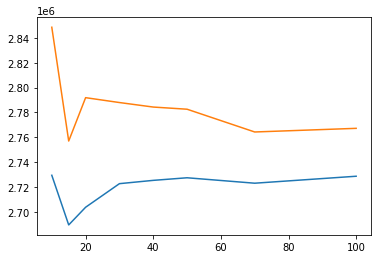

In [31]:
#
width = []
sSize = []
n = [10, 15,20,30,40,50,70,100]
for i in  n:
  sample = bm['samples'].sample(n=i)
  width.append(CLTConfInt(sample))
  sSize.append(i)
  i=int(np.round(i*1.2))

sSize = np.array(sSize).reshape(-1, 1)
width = np.array(width)
print(width.shape)
plt.plot(sSize, width[:,0])
plt.plot(sSize, width[:,1])
plt.show()




#### *Written Answer:*
at around 30 the deviation from the mean stops decreasing as quickly

### Q 1.16 - <span style="color:red">[6]</span> - Randomly subsample your "sample statistic" with $n=30$ and calculate $t$-based 99% CI. Is it a good idea to calculate CI for this data set this way? Why?

In [38]:
#
thirtySample = bm['samples'].sample(n=30)
alpha = (1/100)
crit_val = 1-(alpha/2)

# Degrees of freedom (dof) of an estimate is the number of independent
# pieces of information that went into calculating the estimate.
dof = 30-1
# the precise shape of the t distribution depends on dof, which is related to the sample size.

# ppf: percent point function (inverse of cdf — percentiles).
# It returns the value x of the variable that has a given cumulative distribution probability (cdf).
# Thus, given the cdf(x) of a x value, ppf returns the value x itself, therefore, operating as the inverse of cdf.
t_value = t.ppf(crit_val, df=dof) # 1st arg: critical value; 2nd arg: dof

stderr = np.std(thirtySample) / np.sqrt(len(thirtySample))
t_ci = thirtySample.mean() + t_value * stderr * np.array([-1, 1])
print('The t-based confidence interval is equal to {}'.format(t_ci.round(3)))

The t-based confidence interval is equal to [2715241.157 2778614.939]


#### *Written Answer:*
This would be a good method as there is a large sample number.

### Q 1.17 - <span style="color:red">[3]</span> -  What method would be your ultimate choice for calculating CI for this problem? Why?

[link text](https://)#### *Written Answer:*
Id go with the las one as it gives a smaller interval of confidence and not as much data is required